# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import loadData, normalizeData, degexpand

# Loading and Normalizing Dataset

In [2]:
# Load dataset
t, X = loadData()

# Normalize features and target values
X_n = normalizeData(X)
t_n = normalizeData(t)

# Training and Testing Data

In [3]:
# Define training and testing datasets
X_train = X_n[:100]
t_train = t_n[:100]
X_test = X_n[100:]
t_test = t_n[100:]

# Defining Polynomial Regression

In [4]:
def polynomial_regression(X_train, t_train, X_test, t_test, max_degree=10):
    train_errors = []
    test_errors = []
    degrees = range(1, max_degree + 1)

    for d in degrees:
        # Expand feature space
        Phi_train = degexpand(X_train, d)
        Phi_test = degexpand(X_test, d)

        # Compute weights using Normal Equation: w = (X^T X)^(-1) X^T t
        w = np.linalg.pinv(Phi_train.T @ Phi_train) @ Phi_train.T @ t_train

        # Predictions
        t_train_pred = Phi_train @ w
        t_test_pred = Phi_test @ w

        # Compute MSE
        train_mse = np.mean((t_train - t_train_pred) ** 2)
        test_mse = np.mean((t_test - t_test_pred) ** 2)

        train_errors.append(train_mse)
        test_errors.append(test_mse)

    return degrees, train_errors, test_errors

# Plotting

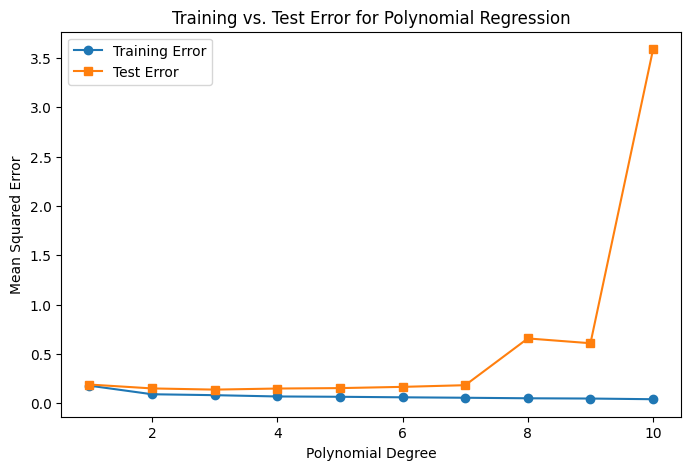

In [5]:
# Run polynomial regression
degrees, train_errors, test_errors = polynomial_regression(X_train, t_train, X_test, t_test)

# Plot training vs. test errors
plt.figure(figsize=(8, 5))
plt.plot(degrees, train_errors, label="Training Error", marker='o')
plt.plot(degrees, test_errors, label="Test Error", marker='s')
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Training vs. Test Error for Polynomial Regression")
plt.legend()
plt.show()

# Plot Analysis

From My observation on the graph I see that training error decreases as the polynomial degree increases which i feel is expected as higher degree polynomial can fit the training data very well. However, I see that test error remains low and stable for degrees 1 to 6. After degree 7 it starts increasing and at degree 10 it spikes significantly which suggests that based on given data and division of train and test data the model is Overfitting. I feel that Higher-degree polynomials capture noise rather than the true pattern. Based on the graph I think that degree 3 to 5 seems to be the good tradeoff. Further Ridge Regression can be implemented and results can be compared.